<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/Reto1_Maria_Fernanda_Arroyo_Berrocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de estudio**

Una FINTECH quiere caracterizar la evolución de sus pérdidas en la colocación de sus créditos para los últimos cuatro años de operación.

- Para la caracterización de la distribución agregada de pérdidas, se utilizarán como referencias las variables: Probabilidad de Default, Exposición del Activo, LGD (Garantía del Crédito).

- La entidad financiera posee un horizonte de pérdidas que cubre un total de 4 años (Año 1, Año 2, Año 3, Año 4), para lo cual se quiere evaluar la evolución de las pérdidas durante este período.


# **0.Cargamos las librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para grafico de distribuciones

In [2]:
from google.colab import drive #Conexion automatica con el drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Análisis Año 1**

**1.1. Cargamos los datos**

In [3]:
nxl="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
XDB = pd.read_excel(nxl,sheet_name=5)
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.122566
1338,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.321453
1339,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.017814
1340,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.265477


In [4]:
#Se calcula la distribucion LDA del año 1
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,49.091727
1,46.807427
2,31.491289
3,111.478589
4,69.142679
...,...
1337,47.135679
1338,40.412661
1339,61.750988
1340,60.599575


**1.2. Caracterización de la distribucion LDA**

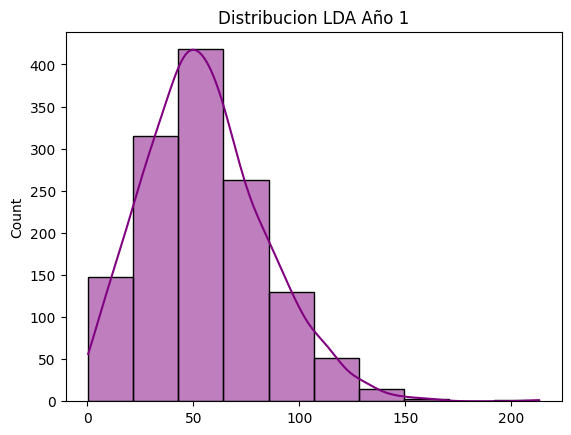

In [5]:
NC= 10

plt.figure()
sns.histplot(LDA,bins=NC,kde=True, color="purple") #Kde: representa la cobertura de la distribucion de probabilidad
plt.title("Distribucion LDA Año 1")
plt.show()

In [6]:
#Obtenemos la informacion de la distribucion

counts, bin_edges = np.histogram(LDA, bins=NC)
LI= bin_edges[:-1];LS=bin_edges[1:]
mc=(LI+LS)/2 #El valor representativo de cada intervalo

In [7]:
#Se crea la tabla de caracterizacion
TAsq=np.column_stack((LI,LS,counts, mc))

In [8]:
df=pd.DataFrame(TAsq,columns=["LI","LS","ND","Perdida"])
display(df)

,LI,LS,ND,Perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


**1.3. Se obtienen las medidas de dispersion (Asimetría, Kurtosis y tendencia central (Media, Varianza, Desviación)**

In [9]:
u=np.sum(mc*counts)/np.sum(counts) #Valor esperado
print("La media de los datos es: ",u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts) #que tan lejos estan los datos de la media
print("La varianza de los datos es: ",varianza) #Si tengo mas intervalos es mas preciso

desviacion=np.sqrt(varianza)
print("La desviacion de los datos es: ",desviacion)

#Quiero identificar datos raros o outliers
LIe= u-2*desviacion;LSe=u+2*desviacion
filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]
#LDA.iloc[filas_out]

cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("La asimetria de los datos es: ",cas)

curt=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print("La curtosis de los datos es: ",curt)

La media de los datos es:  55.91800167999396
La varianza de los datos es:  836.1104127631511
La desviacion de los datos es:  28.91557387919443
La asimetria de los datos es:  0.5936899030624092
La curtosis de los datos es:  0.49072605058951346


In [10]:
from scipy.stats import skew, kurtosis
print("La asimetria de los datos es (colab): ",skew(LDA))
print("La curtosis de los datos es(colab): ",kurtosis(LDA))

La asimetria de los datos es (colab):  0.6074481010737891
La curtosis de los datos es(colab):  0.6938886954460353


In [11]:
vcas=(skew(LDA)-cas)/skew(LDA)
print("La variacion del coeficiente de asimetria es: ",vcas*100) #Las variaciones tienen que estar por debajo del 5%

La variacion del coeficiente de asimetria es:  2.264917445138022


**1.4. Los parametros de riesgo son: Perdidas esperadas, Perdidas no esperadas, Perdidas catastroficas**

In [12]:
PE=len(np.where(LDA<u)[0])
print("Las perdidas esperadas son: ",PE)
OpVar=np.percentile(LDA,99.9)
print("El costo de aseguramiento de cada credito: ",OpVar)
PC=len(np.where(LDA>OpVar)[0])
print("Las perdidas catastroficas son: ",PC)
PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print("Las perdidas no esperadas son: ",PNE)

Las perdidas esperadas son:  729
El costo de aseguramiento de cada credito:  161.29129989014118
Las perdidas catastroficas son:  2
Las perdidas no esperadas son:  611


**Analisis del primer año**

-  De las medidas de tendencia central vemos que la media de las perdidas se ubico en 55.918 dolares por credito, lo que significa que ese es el valor que la FINTECH espera perder por incumplimientos.

- La desviación de los datos se ubico en promedio en los 28.91 dolares, lo cual es una dispersión moderada.

- El coeficiente de asimetria esta por encima de cero, es decir que la distribucion tiende a ser de cola larga

- El coeficiente de curtosis es positivo, lo que indica que la mayoria de los datos estan concentrados cerca del promedio con algunos casos extremos alejados del prometio.

- El 54% de los créditos presentan pérdidas esperadas, lo cual indica un riesgo moderado y predecible. Un 45.5% corresponde a pérdidas no esperadas, lo que sugiere eventos más inciertos que deben ser monitoreados. Solo el 0.15% son pérdidas catastróficas, lo que refleja una baja probabilidad de eventos extremos, pero que aún requieren mecanismos de protección como seguros o provisiones especiales.

# **2. Análisis Año 2**

**2.1. Cargamos los datos**

In [13]:
nxl2="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
XDB2 = pd.read_excel(nxl2,sheet_name=4)
display(XDB2)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6431,41,NR,Casado,3,3,3,2,Primaria,Ninguno,...,36,3.565784,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.310774,363.216125,0.170423
1496,6432,43,Hombre,Viudo,1,1,1,5,Técnico,Fijo,...,24,21.137539,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.129138,489.444824,0.394218
1497,6433,49,NR,Casado,0,2,2,2,Tecnólogo,Ninguno,...,36,27.632010,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081944,505.672943,0.196060
1498,6434,65,NR,Soltero,3,0,0,2,Bachiller,Indefinido,...,48,14.354478,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.084422,568.723694,0.318254


In [14]:
#Se calcula la distribucion LDA del año 2
LDA2=XDB2.iloc[:,25]*XDB2.iloc[:,33]*(1+XDB2.iloc[:,35])
display(LDA2)

,0
0,33.565593
1,51.362740
2,52.265663
3,29.877416
4,48.271477
...,...
1495,35.876078
1496,76.230443
1497,74.910707
1498,54.383147


**2.2. Caracterización de la distribucion LDA**

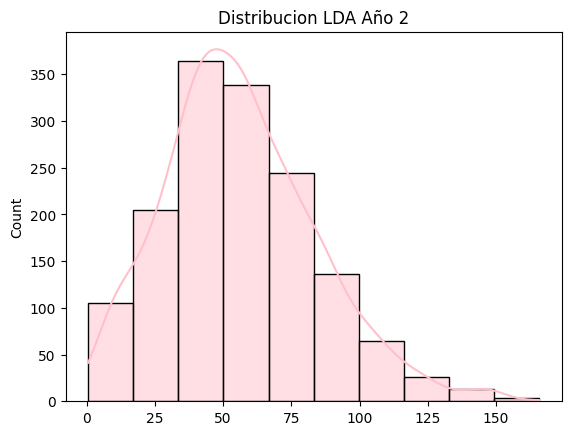

In [15]:
NC2= 10

plt.figure()
sns.histplot(LDA2,bins=NC2,kde=True, color="pink") #Kde: representa la cobertura de la distribucion de probabilidad
plt.title("Distribucion LDA Año 2")
plt.show()

In [16]:
#Obtenemos la informacion de la distribucion

counts2, bin_edges2 = np.histogram(LDA2, bins=NC2)
LI2= bin_edges2[:-1];LS2=bin_edges2[1:]
mc2=(LI2+LS2)/2 #El valor representativo de cada intervalo

In [17]:
#Se crea la tabla de caracterizacion
TAsq2=np.column_stack((LI2,LS2,counts2, mc2))

In [18]:
df2=pd.DataFrame(TAsq2,columns=["LI2","LS2","ND2","Perdida2"])
display(df2)

,LI2,LS2,ND2,Perdida2
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


**2.3. Se obtienen las medidas de dispersion (Asimetría, Kurtosis y tendencia central (Media, Varianza, Desviación)**

In [19]:
u2=np.sum(mc2*counts2)/np.sum(counts2) #Valor esperado
print("La media de los datos es (Año2): ",u2)

varianza2=np.sum(counts2*(mc2-u2)**2)/np.sum(counts2) #que tan lejos estan los datos de la media
print("La varianza de los datos es (Año2): ",varianza2) #Si tengo mas intervalos es mas preciso

desviacion2=np.sqrt(varianza2)
print("La desviacion de los datos es (Año2): ",desviacion2)

#Quiero identificar datos raros o outliers
LIe2= u2-2*desviacion2;LSe2=u2+2*desviacion2
filas_out2=np.where((LDA2<LIe2)|(LDA2>LSe2))[0]
#LDA.iloc[filas_out]

cas2=np.sum(counts2*(mc2-u2)**3)/np.sum(counts2*desviacion2**3)
print("La asimetria de los datos es (Año2): ",cas2)

curt2=np.sum(counts2*(mc2-u2)**4)/(np.sum(counts2)*desviacion2**4)-3
print("La curtosis de los datos es (Año2): ",curt2)

La media de los datos es (Año2):  56.36067049807551
La varianza de los datos es (Año2):  794.299449263555
La desviacion de los datos es (Año2):  28.18331863467386
La asimetria de los datos es (Año2):  0.5398359603970553
La curtosis de los datos es (Año2):  0.2591591450063109


In [20]:
print("La asimetria de los datos es (colab): ",skew(LDA2))
print("La curtosis de los datos es(colab): ",kurtosis(LDA2))

La asimetria de los datos es (colab):  0.5654219317544418
La curtosis de los datos es(colab):  0.3749822454394929


In [21]:
vcas2=(skew(LDA2)-cas2)/skew(LDA2)
print("La variacion del coeficiente de asimetria es: ",vcas2*100) #Las variaciones tienen que estar por debajo del 5%

La variacion del coeficiente de asimetria es:  4.525111234719186


**2.4. Los parametros de riesgo son: Perdidas esperadas, Perdidas no esperadas, Perdidas catastroficas**

In [22]:
PE2=len(np.where(LDA2<u2)[0])
print("Las perdidas esperadas son (Año2): ",PE2)
OpVar2=np.percentile(LDA2,99.9)
print("El costo de aseguramiento de cada credito (Año2): ",OpVar2)
PC2=len(np.where(LDA2>OpVar2)[0])
print("Las perdidas catastroficas son (Año2): ",PC2)
PNE2=len(np.where((LDA2>=u2)&(LDA2<=OpVar2))[0])
print("Las perdidas no esperadas son (Año2): ",PNE2)

Las perdidas esperadas son (Año2):  813
El costo de aseguramiento de cada credito (Año2):  149.7093186014969
Las perdidas catastroficas son (Año2):  2
Las perdidas no esperadas son (Año2):  685


**Análisis del segundo año**

- La media de las pérdidas se ubicó en 56.37 dólares por crédito, lo que representa un ligero aumento frente al año anterior, indicando una expectativa de pérdida un poco mayor por parte de la FINTECH.

- La desviación estándar fue de 28.18 dólares, reflejando una dispersión similar al primer año, lo cual sugiere una consistencia en el comportamiento de riesgo del portafolio.

- El coeficiente de asimetría fue de 0.54, manteniéndose positivo. Esto indica que la distribución sigue siendo de cola larga hacia la derecha, es decir, hay algunos casos con pérdidas mucho mayores al promedio.

- El coeficiente de curtosis fue de 0.26, lo que también señala una concentración alta de datos cerca del promedio, con algunas observaciones extremas, aunque menos pronunciadas que en el primer año.

- En cuanto al riesgo: 54.3% de los créditos presentan pérdidas esperadas, lo cual es consistente con el primer año. 45.7% representan pérdidas no esperadas, lo que indica una proporción estable de incertidumbre. Finalmente, solo el 0.13% de los casos se clasifican como pérdidas catastróficas, lo que confirma una baja incidencia de eventos extremos.

# **3. Análisis Año 3**

**3.1. Cargamos los datos**

In [23]:
nxl3="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
XDB3 = pd.read_excel(nxl3,sheet_name=3)
display(XDB3)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,4275,52,NR,Soltero,3,0,0,3,Bachiller,Indefinido,...,36,2.723832,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.300094,392.462311,0.061951
1497,4277,41,Hombre,Soltero,0,0,0,3,Técnico,Ninguno,...,24,29.256105,Buena Experiencia CFB,Fondo de Garantia,Sin Patrimonio,Con Experiencia sin Mora,1,0.070680,471.957642,0.181782
1498,4279,47,Hombre,Casado,0,0,0,5,Primaria,Indefinido,...,24,48.038625,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.016880,676.783752,0.155792
1499,4281,29,NR,Soltero,0,0,0,2,Bachiller,Ninguno,...,18,26.637042,Buenas Referencias,Con Codeudor(es),Prop.y Vehìculo,Con Experiencia sin Mora,1,0.154959,326.336273,0.511715


In [24]:
#Se calcula la distribucion LDA del año 3
LDA3=XDB3.iloc[:,25]*XDB3.iloc[:,33]*(1+XDB3.iloc[:,35])
display(LDA3)

,0
0,53.566719
1,16.953516
2,35.462688
3,77.548756
4,64.974313
...,...
1496,24.010720
1497,48.948467
1498,18.773132
1499,97.794371


**3.2. Caracterización de la distribucion LDA**

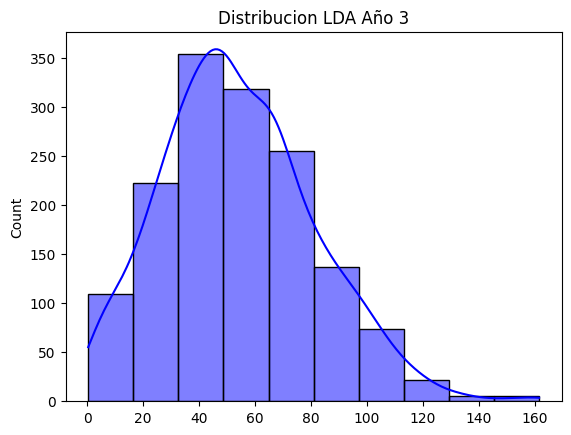

In [25]:
NC3= 10

plt.figure()
sns.histplot(LDA3,bins=NC3,kde=True, color="blue") #Kde: representa la cobertura de la distribucion de probabilidad
plt.title("Distribucion LDA Año 3")
plt.show()

In [26]:
#Obtenemos la informacion de la distribucion

counts3, bin_edges3 = np.histogram(LDA3, bins=NC3)
LI3= bin_edges3[:-1];LS3=bin_edges3[1:]
mc3=(LI3+LS3)/2 #El valor representativo de cada intervalo

In [27]:
#Se crea la tabla de caracterizacion
TAsq3=np.column_stack((LI3,LS3,counts3, mc3))

In [28]:
df3=pd.DataFrame(TAsq3,columns=["LI3","LS3","ND33","Perdida3"])
display(df3)

,LI3,LS3,ND33,Perdida3
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


**3.3. Se obtienen las medidas de dispersion (Asimetría, Kurtosis y tendencia central (Media, Varianza, Desviación)**

In [29]:
u3=np.sum(mc3*counts3)/np.sum(counts3) #Valor esperado
print("La media de los datos es (Año3): ",u3)

varianza3=np.sum(counts3*(mc3-u3)**2)/np.sum(counts3) #que tan lejos estan los datos de la media
print("La varianza de los datos es (Año3) : ",varianza3) #Si tengo mas intervalos es mas preciso

desviacion3=np.sqrt(varianza3)
print("La desviacion de los datos es (Año3): ",desviacion3)

#Quiero identificar datos raros o outliers
LIe3= u3-2*desviacion3;LSe3=u3+2*desviacion3
filas_out3=np.where((LDA3<LIe3)|(LDA3>LSe3))[0]
#LDA.iloc[filas_out]

cas3=np.sum(counts3*(mc3-u3)**3)/np.sum(counts3*desviacion3**3)
print("La asimetria de los datos es (Año3): ",cas3)

curt3=np.sum(counts3*(mc3-u3)**4)/(np.sum(counts3)*desviacion3**4)-3
print("La curtosis de los datos es (Año3): ",curt3)

La media de los datos es (Año3):  54.35795284724899
La varianza de los datos es (Año3) :  746.4973760157775
La desviacion de los datos es (Año3):  27.32210416523181
La asimetria de los datos es (Año3):  0.4630572663350885
La curtosis de los datos es (Año3):  0.05620072169277224


In [30]:
print("La asimetria de los datos es (colab): ",skew(LDA3))
print("La curtosis de los datos es(colab): ",kurtosis(LDA3))

La asimetria de los datos es (colab):  0.46219026649218486
La curtosis de los datos es(colab):  0.18859622645960705


In [31]:
vcas3=(skew(LDA3)-cas3)/skew(LDA3)
print("La variacion del coeficiente de asimetria es: ",vcas3*100) #Las variaciones tienen que estar por debajo del 5%

La variacion del coeficiente de asimetria es:  -0.187585050088517


**3.4. Los parametros de riesgo son: Perdidas esperadas, Perdidas no esperadas, Perdidas catastroficas**

In [32]:
PE3=len(np.where(LDA3<u3)[0])
print("Las perdidas esperadas son (Año 3): ",PE3)
OpVar3=np.percentile(LDA3,99.9)
print("El costo de aseguramiento de cada credito (Año 3): ",OpVar3)
PC3=len(np.where(LDA3>OpVar3)[0])
print("Las perdidas catastroficas son (Año 3): ",PC3)
PNE3=len(np.where((LDA3>=u3)&(LDA3<=OpVar3))[0])
print("Las perdidas no esperadas son (Año 3): ",PNE3)

Las perdidas esperadas son (Año 3):  809
El costo de aseguramiento de cada credito (Año 3):  160.70668633158058
Las perdidas catastroficas son (Año 3):  2
Las perdidas no esperadas son (Año 3):  690


**Análisis del tercer año**

- La media de las pérdidas fue de 54.36 dólares por crédito, mostrando una ligera disminución respecto al segundo año, lo que puede reflejar una leve mejora en el comportamiento crediticio.

- La desviación estándar fue de 27.32 dólares, lo que indica una dispersión moderada y estable en comparación con los años anteriores.

- El coeficiente de asimetría fue de 0.46, por lo que la distribución mantiene una cola larga a la derecha, es decir, siguen existiendo casos con pérdidas inusualmente altas.

- La curtosis de 0.05 indica una concentración de datos más cercana a la normalidad, aunque aún con algunas observaciones extremas.

- El 60% de los créditos presentan pérdidas esperadas, mientras que el 39.5% corresponden a pérdidas no esperadas, lo que sugiere una mejora en la capacidad de predicción del riesgo. Las pérdidas catastróficas siguen siendo mínimas (0.15%), lo que indica una buena gestión del riesgo extremo.

# **4. Análisis Año 4**

**4.1. Cargamos los datos**

In [33]:
nxl4="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
XDB4 = pd.read_excel(nxl4,sheet_name=2)
display(XDB4)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2107,34,Hombre,Separado,0,1,1,2,Técnico,Ninguno,...,48,1.648938,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.318118,332.775055,0.358276
1496,2109,43,Mujer,Casado,6,0,0,3,Bachiller,Indefinido,...,36,1.617232,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.319108,386.770935,0.199316
1497,2110,29,Mujer,Casado,1,1,1,3,Ninguno,Indefinido,...,3,132.534580,Buena Experiencia CFB,Fondo de Garantia,Vehìculo sin Prenda,Con Experiencia sin Mora,0,0.149004,351.520782,0.124456
1498,2111,49,Mujer,Casado,1,0,0,5,Bachiller,Indefinido,...,24,43.986039,Buena Experiencia CFB,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.086956,547.640869,0.112639


In [34]:
#Se calcula la distribucion LDA del año 4
LDA4=XDB4.iloc[:,25]*XDB4.iloc[:,33]*(1+XDB4.iloc[:,35])
display(LDA4)

,0
0,30.452702
1,38.595235
2,52.482156
3,91.404252
4,81.890611
...,...
1495,24.255075
1496,17.120129
1497,64.668290
1498,85.242859


**4.2. Caracterización de la distribucion LDA**

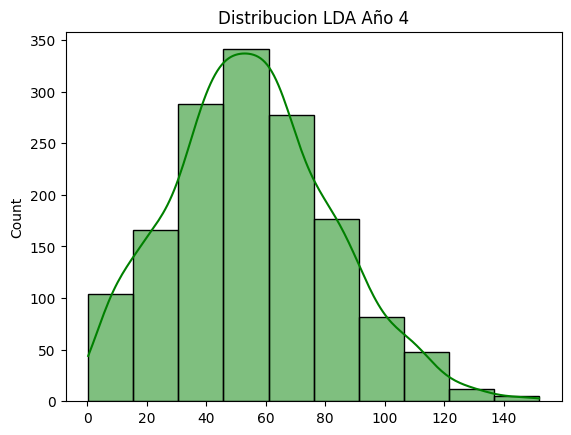

In [35]:
NC4= 10

plt.figure()
sns.histplot(LDA4,bins=NC4,kde=True, color="green") #Kde: representa la cobertura de la distribucion de probabilidad
plt.title("Distribucion LDA Año 4")
plt.show()

In [36]:
#Obtenemos la informacion de la distribucion

counts4, bin_edges4 = np.histogram(LDA4, bins=NC4)
LI4= bin_edges4[:-1];LS4=bin_edges4[1:]
mc4=(LI4+LS4)/2 #El valor representativo de cada intervalo

In [37]:
#Se crea la tabla de caracterizacion
TAsq4=np.column_stack((LI4,LS4,counts4, mc4))

In [38]:
df4=pd.DataFrame(TAsq4,columns=["LI4","LS4","ND4","Perdida4"])
display(df4)

,LI4,LS4,ND4,Perdida4
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


**4.3. Se obtienen las medidas de dispersion (Asimetría, Kurtosis y tendencia central (Media, Varianza, Desviación)**

In [39]:
u4=np.sum(mc4*counts4)/np.sum(counts4) #Valor esperado
print("La media de los datos es (Año4): ",u4)

varianza4=np.sum(counts4*(mc4-u4)**2)/np.sum(counts4) #que tan lejos estan los datos de la media
print("La varianza de los datos es (Año4): ",varianza4) #Si tengo mas intervalos es mas preciso

desviacion4=np.sqrt(varianza4)
print("La desviacion de los datos es (Año4): ",desviacion4)

#Quiero identificar datos raros o outliers
LIe4= u4-2*desviacion4;LSe4=u4+2*desviacion4
filas_out4=np.where((LDA4<LIe4)|(LDA4>LSe4))[0]
#LDA4.iloc[filas_out4]

cas4=np.sum(counts4*(mc4-u4)**3)/np.sum(counts4*desviacion4**3)
print("La asimetria de los datos es (Año4): ",cas4)

curt4=np.sum(counts4*(mc4-u4)**4)/(np.sum(counts4)*desviacion4**4)-3
print("La curtosis de los datos es (Año4): ",curt4)

La media de los datos es (Año4):  55.66597231387269
La varianza de los datos es (Año4):  738.0837467102078
La desviacion de los datos es (Año4):  27.167696750188593
La asimetria de los datos es (Año4):  0.33970946303261645
La curtosis de los datos es (Año4):  -0.1037825028068542


In [40]:
print("La asimetria de los datos es (colab): ",skew(LDA4))
print("La curtosis de los datos es(colab): ",kurtosis(LDA4))

La asimetria de los datos es (colab):  0.3354409078926966
La curtosis de los datos es(colab):  -0.06285449119370945


In [41]:
vcas4=(skew(LDA4)-cas4)/skew(LDA4)
print("La variacion del coeficiente de asimetria es: ",vcas4*100) #Las variaciones tienen que estar por debajo del 5%

La variacion del coeficiente de asimetria es:  -1.2725207449311218


**4.4. Los parametros de riesgo son: Perdidas esperadas, Perdidas no esperadas, Perdidas catastroficas**

In [42]:
PE4=len(np.where(LDA4<u4)[0])
print("Las perdidas esperadas son (Año4): ",PE4)
OpVar4=np.percentile(LDA4,99.9)
print("El costo de aseguramiento de cada credito (Año4): ",OpVar4)
PC4=len(np.where(LDA4>OpVar4)[0])
print("Las perdidas catastroficas son (Año4): ",PC4)
PNE4=len(np.where((LDA4>=u4)&(LDA4<=OpVar4))[0])
print("Las perdidas no esperadas son (Año4): ",PNE4)

Las perdidas esperadas son (Año4):  781
El costo de aseguramiento de cada credito (Año4):  147.29776773898615
Las perdidas catastroficas son (Año4):  2
Las perdidas no esperadas son (Año4):  717


**Análisis del cuarto año**

De las medidas de tendencia central, la media de las pérdidas se ubicó en 55.66 dólares por crédito, lo que representa el valor promedio que la FINTECH espera perder por incumplimientos.

La desviación estándar fue de 27.16 dólares, lo que indica una dispersión moderada de los datos.

El coeficiente de asimetría fue 0.33, lo que indica una distribución ligeramente sesgada a la derecha, es decir, con más casos de pérdidas bajas y pocos de pérdidas altas.

El coeficiente de curtosis fue negativo (-0.06), lo que sugiere una distribución más plana que la normal, con datos menos concentrados alrededor de la media.

El 50.8% de los créditos presentan pérdidas esperadas (781 casos), lo que refleja un riesgo previsible. Un 46.6% corresponden a pérdidas no esperadas (717 casos), lo cual implica un riesgo variable y más incierto. Solo el 0.13% de los créditos (2 casos) se clasifican como pérdidas catastróficas, lo que indica una baja frecuencia de eventos extremos, aunque con alto impacto potencial.

# **5. Analisis comparativo entre años**

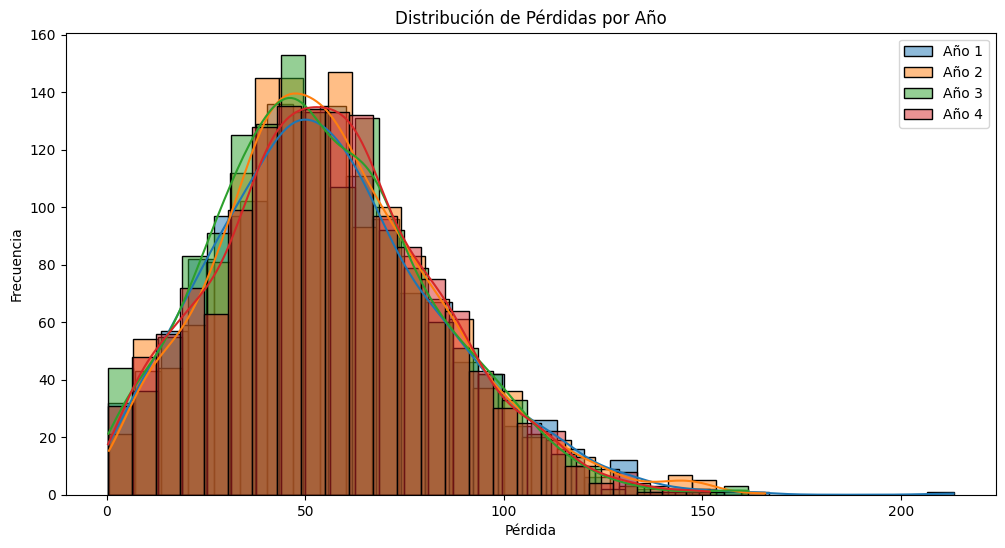

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(LDA, label='Año 1', kde=True)
sns.histplot(LDA2, label='Año 2', kde=True)
sns.histplot(LDA3, label='Año 3', kde=True)
sns.histplot(LDA4, label='Año 4', kde=True)
plt.title('Distribución de Pérdidas por Año')
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En la gráfica comparativa de la distribución de la LDA para los cuatro años vemos curvas muy similares, lo que puede significar que la estructura de riesgo de la cartera de créditos ha sido constante y controlada. Todas las curvas presentan un comportamiento similar en términos de concentración de pérdidas moderadas y una cola hacia la derecha, lo que sugiere asimetría positiva. Esta estabilidad es una señal positiva para la FINTECH, ya que así se puede proyectar con mayor certeza las pérdidas futuras.

In [44]:
# Crear un diccionario con los datos
data = {'Año 1': [u, varianza, desviacion, skew(LDA), kurtosis(LDA)],
        'Año 2': [u2, varianza2, desviacion2, skew(LDA2), kurtosis(LDA2)],
        'Año 3': [u3, varianza3, desviacion3, skew(LDA3), kurtosis(LDA3)],
        'Año 4': [u4, varianza4, desviacion4, skew(LDA4), kurtosis(LDA4)]}

# Crear el DataFrame
df_comparativo = pd.DataFrame(data, index=['Media', 'Varianza', 'Desviación', 'Asimetría', 'Kurtosis'])

# Mostrar la tabla
display(df_comparativo)

,Año 1,Año 2,Año 3,Año 4
Media,55.918002,56.360670,54.357953,55.665972
Varianza,836.110413,794.299449,746.497376,738.083747
Desviación,28.915574,28.183319,27.322104,27.167697
Asimetría,0.607448,0.565422,0.462190,0.335441
Kurtosis,0.693889,0.374982,0.188596,-0.062854


In [45]:
# Crear un diccionario con los datos de riesgo
data_riesgo = {'Año 1': [PE, PNE, PC, OpVar],
               'Año 2': [PE2, PNE2, PC2, OpVar2],
               'Año 3': [PE3, PNE3, PC3, OpVar3],
               'Año 4': [PE4, PNE4, PC4, OpVar4]}

# Crear el DataFrame
df_riesgo = pd.DataFrame(data_riesgo, index=['Pérdidas Esperadas', 'Pérdidas No Esperadas', 'Pérdidas Catastróficas', 'Costo de Aseguramiento'])

# Mostrar la tabla
display(df_riesgo)

,Año 1,Año 2,Año 3,Año 4
Pérdidas Esperadas,729.0000,813.000000,809.000000,781.000000
Pérdidas No Esperadas,611.0000,685.000000,690.000000,717.000000
Pérdidas Catastróficas,2.0000,2.000000,2.000000,2.000000
Costo de Aseguramiento,161.2913,149.709319,160.706686,147.297768


- A lo largo de los cuatro años, la media de la LDA se ha mantenido relativamente estable, oscilando entre 54.35 y 56.36, esto nos muestra una consistencia en el comportamiento promedio de las pérdidas.

- La varianza y desviación estándar muestran una ligera disminución a lo largo de los años, esto puede significar una reducción en la dispersión de las pérdidas y a su vez menos volatilidad en el riesgo.

- En cuanto a la asimetría, todos los años presentan valores positivos, lo que indica una distribución sesgada a la derecha, con posibilidad de pérdidas extremas. Sin embargo, esta asimetría disminuye año tras año, lo que implica que las pérdidas extremas se están volviendo menos frecuentes.

- Finalmente, la kurtosis también desciende, e incluso llega a ser negativa en el año 4, es decir que la distribución tiende a ser más plana, con menos colas pesadas, es decir, menor probabilidad de pérdidas catastróficas.